# Importing libraries

In [14]:
import numpy as np # linear algebra
import pandas as pd # loading and processing the data (e.g. pd.read_csv)
from google.colab import drive

import matplotlib.pyplot as mp

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf


# Loading the Dataset

In [ ]:
# Mounting the drive where the dataset is saved.
drive.mount('/content/drive')

# Loading the dataset
df=pd.read_csv("/content/drive/MyDrive/R&D (Dataset)/amazon_baby.csv")

#link of the dataset : https://www.kaggle.com/datasets/sameersmahajan/reviews-of-amazon-baby-products

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Explaination** This dataset has been obtained from kaggle, it has three columns. The name of the products, review, and rating. The review column is the text column that contains the comment of the customers and the rating column has the number rating ranging from 1 to 5. 1 being the worst and 5 being the best rating

# Data Preperation

**Step 1: Changing the review from rating to sentiments**

In [27]:
df['sentiments'] = df.rating.apply(lambda x: 0 if x in [1, 2] else 1)

**Explanation** we can use the rating column to understand the sentiments. We have ratings from 1 to 5. So, when the rating is 1 or 2, that review can be considered a negative review, and when the rating is 3, 4, or 5, then the review may be considered as a positive review. We can set 0 for negative sentiments and 1 for positive sentiments.

**Step 2 : Creating tokens**

 Here the value of oov_token is set to be ‘OOV’. That means any unknown words will be replaced by oov_token. This is a better option instead of throwing out unknown words

In [ ]:
tokenizer = Tokenizer(oov_token="<OOV>")

**Step 3: Splitting the dataset**

In [ ]:
split = round(len(df)*0.8)
train_reviews = df['review'][:split]
train_label = df['sentiments'][:split]
test_reviews = df['review'][split:]
test_label = df['sentiments'][split:]

**Step 4: Converting each review to string**

This will make sure that if there is any data that is not in string format, we will not get an error later on during the model training

In [ ]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

**Step 5: Tokenzing the words**

In [ ]:
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

**Explainantion :**
The value vocab_size 40,000 indicates that we will use 40,000 distinct words to train the network. Because dimension 16 is embedded, each word is represented as a 16-dimensional vector. The length of each review is represented by max_length 120. Each review will be limited to 120 words. If the original comment is more than 120 words long, it will be shortened. The word trunc_type has been set to 'post'. When a review is longer than 120 words, it will be trimmed at the conclusion. If the review is less than 120 words, it will be padded to make it 120 words. Finally, padding_type 'post' indicates that padding will be added at the end rather than the beginning.

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'it': 4,
 'i': 5,
 'to': 6,
 'a': 7,
 'is': 8,
 'this': 9,
 'for': 10,
 'my': 11,
 'of': 12,
 'in': 13,
 'that': 14,
 'with': 15,
 'on': 16,
 'was': 17,
 'have': 18,
 'but': 19,
 'we': 20,
 'so': 21,
 'not': 22,
 'you': 23,
 'are': 24,
 'as': 25,
 'one': 26,
 'baby': 27,
 'they': 28,
 'very': 29,
 'when': 30,
 'be': 31,
 'great': 32,
 'at': 33,
 'would': 34,
 'just': 35,
 'up': 36,
 'out': 37,
 'use': 38,
 'all': 39,
 'he': 40,
 "it's": 41,
 'can': 42,
 'she': 43,
 'our': 44,
 'like': 45,
 'had': 46,
 'if': 47,
 'these': 48,
 'them': 49,
 'or': 50,
 'her': 51,
 'has': 52,
 'love': 53,
 'seat': 54,
 'little': 55,
 'get': 56,
 'easy': 57,
 'old': 58,
 'only': 59,
 'from': 60,
 'well': 61,
 'because': 62,
 'will': 63,
 'more': 64,
 'also': 65,
 'really': 66,
 'product': 67,
 'time': 68,
 'about': 69,
 'bought': 70,
 'other': 71,
 'too': 72,
 'no': 73,
 'son': 74,
 'than': 75,
 'much': 76,
 'now': 77,
 'me': 78,
 'good': 79,
 "don't": 80,
 'there': 81,
 

**Explainatin** Each word has an integer value

**Step 6:**  Convert the sentences into the sequences of words

In [12]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

# Model Building

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           640000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 640109 (2.44 MB)
Trainable params: 640109 (2.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Complilation**

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Model Training**

In [18]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [20]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
4589/4589 [==============================] - 42s 9ms/step - loss: 0.2058 - accuracy: 0.9141 - val_loss: 0.1937 - val_accuracy: 0.9209
Epoch 2/20
4589/4589 [==============================] - 39s 9ms/step - loss: 0.1906 - accuracy: 0.9210 - val_loss: 0.1955 - val_accuracy: 0.9184
Epoch 3/20
4589/4589 [==============================] - 38s 8ms/step - loss: 0.1816 - accuracy: 0.9250 - val_loss: 0.1958 - val_accuracy: 0.9206
Epoch 4/20
4589/4589 [==============================] - 39s 8ms/step - loss: 0.1750 - accuracy: 0.9275 - val_loss: 0.1967 - val_accuracy: 0.9195
Epoch 5/20
4589/4589 [==============================] - 39s 8ms/step - loss: 0.1689 - accuracy: 0.9303 - val_loss: 0.1991 - val_accuracy: 0.9180
Epoch 6/20
4589/4589 [==============================] - 39s 8ms/step - loss: 0.1629 - accuracy: 0.9327 - val_loss: 0.2021 - val_accuracy: 0.9173
Epoch 7/20
4589/4589 [==============================] - 39s 8ms/step - loss: 0.1571 - accuracy: 0.9352 - val_loss: 0.2112 - val_ac

# Model Validation

In [22]:
data = [
"Epoch 1/20 4589/4589 [==============================] - 40s 8ms/step - loss: 0.2849 - accuracy: 0.8831 - val_loss: 0.2209 - val_accuracy: 0.9094",
"Epoch 2/20 4589/4589 [==============================] - 35s 8ms/step - loss: 0.2098 - accuracy: 0.9127 - val_loss: 0.1990 - val_accuracy: 0.9186",
"Epoch 3/20 4589/4589 [==============================] - 36s 8ms/step - loss: 0.1931 - accuracy: 0.9195 - val_loss: 0.2000 - val_accuracy: 0.9177",
"Epoch 4/20 4589/4589 [==============================] - 35s 8ms/step - loss: 0.1837 - accuracy: 0.9234 - val_loss: 0.1993 - val_accuracy: 0.9168",
"Epoch 5/20 4589/4589 [==============================] - 35s 8ms/step - loss: 0.1766 - accuracy: 0.9264 - val_loss: 0.2013 - val_accuracy: 0.9163",
"Epoch 6/20 4589/4589 [==============================] - 35s 8ms/step - loss: 0.1708 - accuracy: 0.9287 - val_loss: 0.2044 - val_accuracy: 0.9174",
"Epoch 7/20 4589/4589 [==============================] - 36s 8ms/step - loss: 0.1656 - accuracy: 0.9309 - val_loss: 0.2164 - val_accuracy: 0.9166",
"Epoch 8/20 4589/4589 [==============================] - 35s 8ms/step - loss: 0.1606 - accuracy: 0.9332 - val_loss: 0.2122 - val_accuracy: 0.9155",
"Epoch 9/20 4589/4589 [==============================] - 35s 8ms/step - loss: 0.1560 - accuracy: 0.9354 - val_loss: 0.2203 - val_accuracy: 0.9170",
"Epoch 10/20 4589/4589 [==============================] - 36s 8ms/step - loss: 0.1515 - accuracy: 0.9373 - val_loss: 0.2222 - val_accuracy: 0.9161",
"Epoch 11/20 4589/4589 [==============================] - 35s 8ms/step - loss: 0.1468 - accuracy: 0.9396 - val_loss: 0.2225 - val_accuracy: 0.9143",
"Epoch 12/20 4589/4589 [==============================] - 37s 8ms/step - loss: 0.1427 - accuracy: 0.9413 - val_loss: 0.2330 - val_accuracy: 0.9120",
"Epoch 13/20 4589/4589 [==============================] - 36s 8ms/step - loss: 0.1386 - accuracy: 0.9432 - val_loss: 0.2369 - val_accuracy: 0.9131",
"Epoch 14/20 4589/4589 [==============================] - 34s 7ms/step - loss: 0.1344 - accuracy: 0.9455 - val_loss: 0.2418 - val_accuracy: 0.9102",
"Epoch 15/20 4589/4589 [==============================] - 36s 8ms/step - loss: 0.1307 - accuracy: 0.9470 - val_loss: 0.2487 - val_accuracy: 0.9073",
"Epoch 16/20 4589/4589 [==============================] - 37s 8ms/step - loss: 0.1272 - accuracy: 0.9490 - val_loss: 0.2574 - val_accuracy: 0.9058",
"Epoch 17/20 4589/4589 [==============================] - 36s 8ms/step - loss: 0.1237 - accuracy: 0.9502 - val_loss: 0.2663 - val_accuracy: 0.9009",
"Epoch 18/20 4589/4589 [==============================] - 36s 8ms/step - loss: 0.1202 - accuracy: 0.9519 - val_loss: 0.2734 - val_accuracy: 0.9028",
"Epoch 19/20 4589/4589 [==============================] - 36s 8ms/step - loss: 0.1173 - accuracy: 0.9536 - val_loss: 0.2810 - val_accuracy: 0.8978",
"Epoch 20/20 4589/4589 [==============================] - 36s 8ms/step - loss: 0.1144 - accuracy: 0.9550 - val_loss: 0.2959 - val_accuracy: 0.9058"]

# Initialize lists to store the metrics for each epoch
epochs = []
losses = []
accuracies = []
val_losses = []
val_accuracies = []

# Extract losses and accuracies for each epoch
for entry in data:
    parts = entry.split()
    epoch = int(parts[1].split('/')[0])

    loss = accuracy = val_loss = val_accuracy = None

    for i in range(len(parts)):
        if parts[i] == "loss:":
            loss = float(parts[i + 1])
        elif parts[i] == "accuracy:":
            accuracy = float(parts[i + 1])
        elif parts[i] == "val_loss:":
            val_loss = float(parts[i + 1])
        elif parts[i] == "val_accuracy:":
            val_accuracy = float(parts[i + 1])

    if None not in [loss, accuracy, val_loss, val_accuracy]:
        epochs.append(epoch)
        losses.append(loss)
        accuracies.append(accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

# Create a table
import pandas as pd
table = pd.DataFrame({
    "Epoch": epochs,
    "Loss": losses,
    "Accuracy": accuracies,
    "Val_Loss": val_losses,
    "Val_Accuracy": val_accuracies
})

# Display the table
print(table)

    Epoch    Loss  Accuracy  Val_Loss  Val_Accuracy
0       1  0.2849    0.8831    0.2209        0.9094
1       2  0.2098    0.9127    0.1990        0.9186
2       3  0.1931    0.9195    0.2000        0.9177
3       4  0.1837    0.9234    0.1993        0.9168
4       5  0.1766    0.9264    0.2013        0.9163
5       6  0.1708    0.9287    0.2044        0.9174
6       7  0.1656    0.9309    0.2164        0.9166
7       8  0.1606    0.9332    0.2122        0.9155
8       9  0.1560    0.9354    0.2203        0.9170
9      10  0.1515    0.9373    0.2222        0.9161
10     11  0.1468    0.9396    0.2225        0.9143
11     12  0.1427    0.9413    0.2330        0.9120
12     13  0.1386    0.9432    0.2369        0.9131
13     14  0.1344    0.9455    0.2418        0.9102
14     15  0.1307    0.9470    0.2487        0.9073
15     16  0.1272    0.9490    0.2574        0.9058
16     17  0.1237    0.9502    0.2663        0.9009
17     18  0.1202    0.9519    0.2734        0.9028
18     19  0

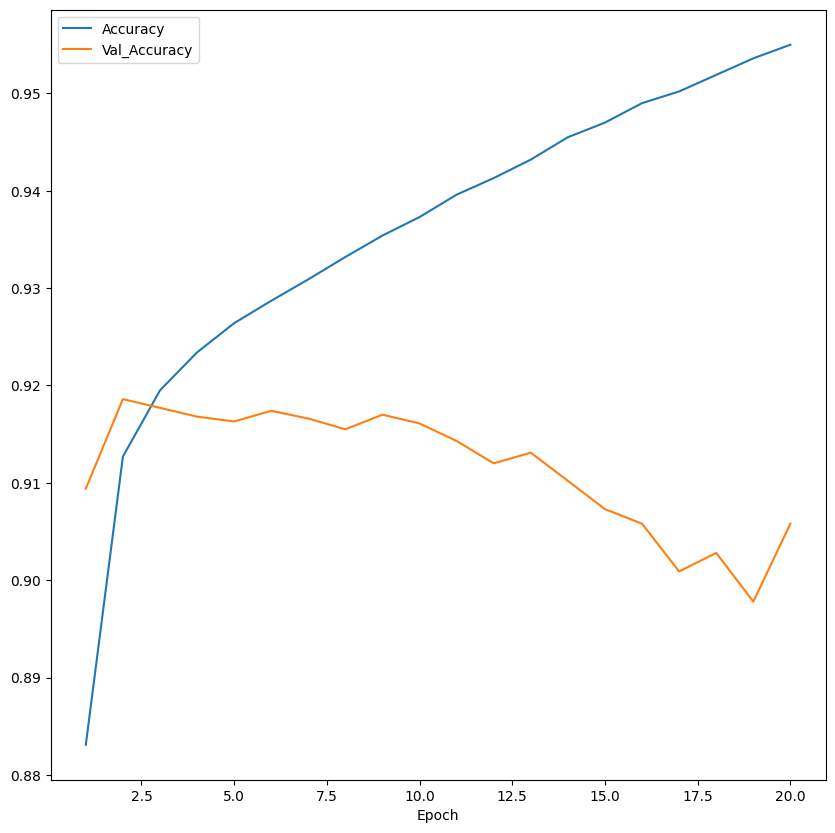

In [26]:

# plot multiple columns such as population and year from dataframe
table.plot(x="Epoch", y=["Accuracy", "Val_Accuracy"],
        kind="line", figsize=(10, 10))

# display plot
mp.show()

**Conclusion : After 20 epochs validation accuracy is ariund 90% which and we can see that it is gradually increasing.**